<a href="https://colab.research.google.com/github/amberxuqianchen/nlp-workshop/blob/main/NLP_Workshop_3_Word_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embeddings

Adopted from Exploring Gender Bias in Word Embedding https://learn.responsibly.ai/word-embedding

# Overview

## Learning Objectives:

1. Gaining an intuitive technical understanding of bias in texts;

2. Linking textual bias with reality bias.

## Audience
Everyone, really. No previous knowledge is assumed. If you have a background, you will be able to understand the topic more deeply.


## Method

1. Dive into a word2vec model;

2. Focus on one example of bias: by gender.

## Disclaimers

1. We focus on gender bias, and treat it as binary for the simplicity in this work. Nevertheless, gender is a complex social construct, and we should keep it in mind when we go back from a learning context to the real-world.

2. We don't aim to give a comprehensive overview of neither bias in machine learning nor stereotypical bias in real life.

3. If you need to work on one of these topics, this workshop is far from being enough, but it can serve as a starting point for your learning path.

4. On top of that, it is an active area of research.


## Legend
💎 Important

⚡ Be Aware - Debated issue / interpret carefully / simplicity over precision

🛠️ Setup/Technical (a.k.a "the code is not important, just run it!")

🧪 Methodological Issue

💻 Hands-On - Your turn! NO programming background

⌨️ ... A little programming background (in Python) is required

🦄 Out of Scope

## Advice for using Colab
1. Make a local copy to your Drive: otherwise changes you make (e.g. notes you take, code you write, etc) will not be saved
2. Do not edit the same colab directly as a group. Unlike Google Docs, one person’s version will overwrite another’s. If your browser happens to be open, it can overwrite anything that has been done by others since the last version in your browser!
3. Colab does not have version control! Use git for this if you want to collaborate (on a group project colab for example)


# Part One: Setup

## 1.1 - 🛠️ Install `responsibly`

`responsibly` is used for tutorial purpose, since it has not updated for years, you might consider using `gensim` for real stuff.

In [ ]:
%pip install --user responsibly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---

### You might need to restart youe notebook
<big>⚠️</big>

If you get an error of **`ModuleNotFoundError: No module named 'responsibly'`** after the `import responsibly` in the next cell, and you work on either **Colab** or **Binder** - this is **normal**.
<br/> <br/>
**Restart** the Kernel/Runtime (use the menu on top or the botton in the notebook), **skip** the installation cell (`!pip install --user responsibly`) and **run** the previous cell again (`import responsibly`).

Now it should all work fine!

---

## 1.2 - Validate Installation of `responsibly`
<big>🛠️</big>

In [ ]:
import responsibly

# You should get '0.1.3'
responsibly.__version__

AttributeError: ignored

# Part Two: Examples of Bias in Language Technology

## 2.1 - Recruiting tool

"Amazon scraps secret AI recruiting tool that showed bias against women" ([Reuters](https://www.reuters.com/article/us-amazon-com-jobs-automation-insight/amazon-scraps-secret-ai-recruiting-tool-that-showed-bias-against-women-idUSKCN1MK08G))

"But by 2015, the company realized its new system was not rating candidates for software developer jobs and other technical posts in a gender-neutral way."


## 2.2 - Natural Language Generation  (chatGPT)



# Part Three: Motivation - Why to use Word Embeddings?

## 3.3 - Esessional Question - How to represent language to machine?

We need some kind of *dictionary* 📖 to transform/encode

→ from a human representation (words) 🗣 🔡

→ to a machine representation (numbers) 🤖 🔢

### First Atempt

### Idea: Bag of Words (for a document)

<small>Source: Zheng, A.& Casari, A. (2018). Feature Engineering for Machine Learning. O'Reilly Media.</small>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vocabulary = ['it', 'they', 'puppy', 'and', 'cat', 'aardvark', 'cute', 'extremely', 'not']

vectorizer = CountVectorizer(vocabulary=vocabulary)

### Bag of words

In [ ]:
vectorizer.fit_transform(['it is a puppy and it is extremely cute']).toarray()

array([[2, 0, 1, 1, 0, 0, 1, 1, 0]])

In [ ]:
vectorizer.fit_transform(['it is not a puppy and it is extremely cute']).toarray()

array([[2, 0, 1, 1, 0, 0, 1, 1, 1]])

In [ ]:
vectorizer.fit_transform(['it is a puppy and it is extremely not cute']).toarray()

array([[2, 0, 1, 1, 0, 0, 1, 1, 1]])

🦄 Read more about scikit-learn's text feature extraction [here](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction).

### One-hot representation

In [ ]:
sentence = 'it is a puppy and it is extremely cute'
[vectorizer.fit_transform([word]).toarray()
 for word in sentence.split()
 if word in vocabulary]

[array([[1, 0, 0, 0, 0, 0, 0, 0, 0]]),
 array([[0, 0, 1, 0, 0, 0, 0, 0, 0]]),
 array([[0, 0, 0, 1, 0, 0, 0, 0, 0]]),
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0]]),
 array([[0, 0, 0, 0, 0, 0, 0, 1, 0]]),
 array([[0, 0, 0, 0, 0, 0, 1, 0, 0]])]

## 3.4 - Idea: Embedding a word in a n-dimensional space
<big>💎</big>

### Distributional Hypothesis
> "a word is characterized by the company it keeps" - [John Rupert Firth](https://en.wikipedia.org/wiki/John_Rupert_Firth)

**Distance ~ Meaning Similarity**


### Examples (algorithms and pre-trained models)
<big>🦄</big>
- [Word2Vec](https://code.google.com/archive/p/word2vec/)
- [GloVe](https://nlp.stanford.edu/projects/glove/)
- [fastText](https://fasttext.cc/)
- [ELMo](https://allennlp.org/elmo) (contextualized)

#### Training: using *word-context* relationships from a corpus.
<big>🦄</big>

See: [The Illustrated Word2vec by Jay Alammar](http://jalammar.github.io/illustrated-word2vec/)

#### State of the Art - Contextual Word Embedding → Language Models
<big>🦄</big>
- [The Illustrated BERT, ELMo, and co. (How NLP Cracked Transfer Learning) by Jay Alammar](http://jalammar.github.io/illustrated-bert/)
- Microsoft - [NLP Best Practices](https://github.com/microsoft/nlp-recipes)
- [Tracking Progress in Natural Language Processing](https://nlpprogress.com/)

# Part Four: Playing with Word2Vec word embedding!

[Word2Vec](https://code.google.com/archive/p/word2vec/) - Google News - 100B tokens, 3M vocab, cased, 300d vectors - only lowercase vocab extracted

Loaded using [`responsibly`](http://docs.responsibly.ai) package, the function [`responsibly.we.load_w2v_small`]() returns a [`gensim`](https://radimrehurek.com/gensim/)'s [`KeyedVectors`](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors) object.

## 4.1 - Basic Properties

In [ ]:
# 🛠️⚡ ignore warnings
# generally, you shouldn't do that, but for this tutorial we'll do so for the sake of simplicity

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from responsibly.we import load_w2v_small
w2v_small = load_w2v_small()

# Test the model
print(w2v_small.most_similar('dog'))

[('dogs', 0.8680490255355835), ('puppy', 0.8106428384780884), ('pit_bull', 0.7803961038589478), ('pooch', 0.7627377510070801), ('cat', 0.7609457969665527), ('pup', 0.7406911849975586), ('canines', 0.7221245765686035), ('pet', 0.7164785265922546), ('canine', 0.6918289661407471), ('pit_bulls', 0.6767823696136475)]


In [ ]:
# vocabulary size
len(w2v_small.vocab)

In [ ]:
# the word embedding dimension, in this case, is 300
len(w2v_small['home'])

300

In [ ]:
# get the vector of the word "home"
print('home =', w2v_small['home'])

In [ ]:
# all the words are normalized (=have norm equal to one as vectors)

from numpy.linalg import norm

norm(w2v_small['home'])

1.0

In [ ]:
# 🛠️ make sure that all the vectors are normalized!

from numpy.testing import assert_almost_equal

length_vectors = norm(w2v_small.vectors, axis=1)

assert_almost_equal(actual=length_vectors,
                    desired=1,
                    decimal=5)

## 4.2 - Mesuring Distance between Words
<big>💎</big>

### Mesure of Similiarty: [Cosine Similariy](https://en.wikipedia.org/wiki/Cosine_similarity)
- Measures the cosine of the angle between two vecotrs.
- Ranges between 1 (same vector) to -1 (opposite/antipode vector)
- In Python, for normalized vectors (Numpy's array), use the `@`(at) operator!

In [ ]:
# @ computes the dot product between two word vectors, measuing the degree of similarity between the meanings of two words when the vectors have been normalized
w2v_small['cat'] @ w2v_small['cat']

1.0000006

In [ ]:
w2v_small['cat'] @ w2v_small['cats']

0.8099383

In [ ]:
# the angle between two word vectors using the cosine similarity measure.
from math import acos, degrees
degrees(acos(w2v_small['cat'] @ w2v_small['cats']))

35.910095270739426

In [ ]:
w2v_small['cat'] @ w2v_small['dog']

0.7609462

In [ ]:
degrees(acos(w2v_small['cat'] @ w2v_small['dog']))

40.452314804469154

In [ ]:
w2v_small['cat'] @ w2v_small['graduated']

-0.003788825

In [ ]:
degrees(acos(w2v_small['cat'] @ w2v_small['graduated']))

90.21708419498997

💎 In general, the use of Word Embedding to encode words, as an input for NLP systems (*), improve their performance compared to one-hot representation.

\* Sometimes the embedding is learned as part of the NLP system.

## 4.3 - Visualizing Word Embedding in 2D using T-SNE 
<big>🛠️</big>

<small>Source: [Google's Seedbank](https://research.google.com/seedbank/seed/pretrained_word_embeddings)</small>

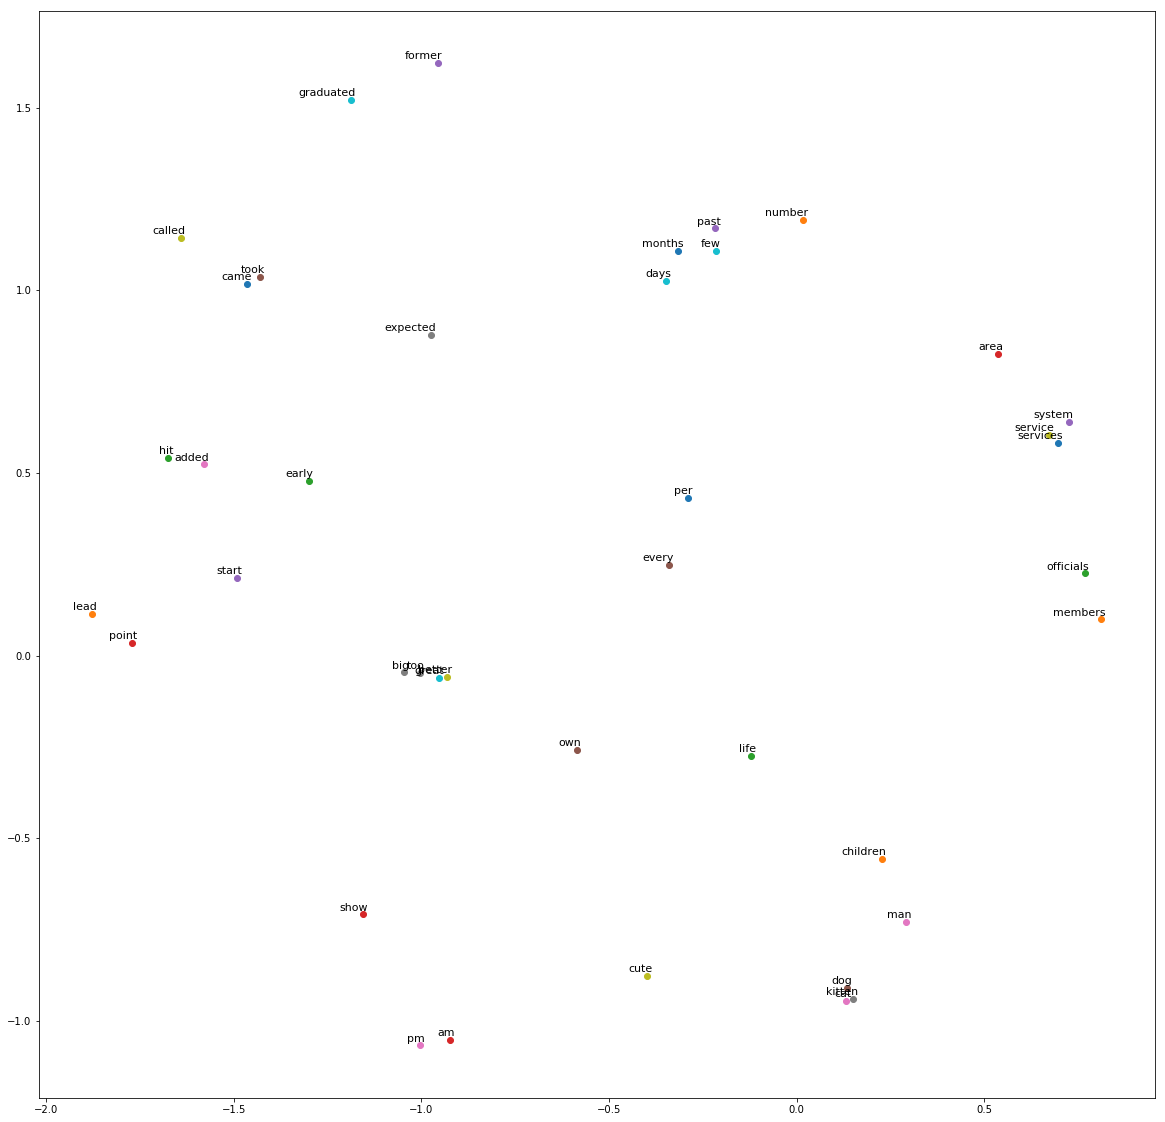

In [ ]:
from sklearn.manifold import TSNE
from matplotlib import pylab as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# take the most common words in the corpus between 200 and 235
words = [word for word in w2v_small.index2word[200:235]]
words.extend(['dog', 'cat', 'kitten', 'cute','graduated'])


# convert the words to vectors
embeddings = np.array([w2v_small[word] for word in words])

# perform T-SNE: 2D
words_embedded = TSNE(n_components=2).fit_transform(embeddings)

# ... and visualize!
plt.figure(figsize=(20, 20))
for i, label in enumerate(words):
    x, y = words_embedded[i, :]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                 ha='right', va='bottom', size=11)
plt.show()



### Extra: [Tensorflow Embedding Projector](http://projector.tensorflow.org)
⚡ Be cautious: It is easy to see "patterns".

## 4.4 - Most Similar

What are the most simlar words (=closer) to a given word?

In [ ]:
w2v_small.most_similar('cat')

### EXTRA: Doesn't Match

Given a list of words, which one doesn't match?

The word further away from the mean of all words.

In [ ]:
w2v_small.doesnt_match('breakfast cereal dinner lunch'.split())

'cereal'

## 4.5 - Vector Arithmetic

In [ ]:
# nature + science = ?

w2v_small.most_similar(positive=['nature', 'science'])

[('biology', 0.5784977674484253),
 ('ecology', 0.5561812520027161),
 ('scientific', 0.5484972596168518),
 ('sciences', 0.5216706991195679),
 ('physics', 0.49387645721435547),
 ('geography', 0.4893345832824707),
 ('geology', 0.4885982275009155),
 ('mathematics', 0.48719534277915955),
 ('humanities', 0.48349496722221375),
 ('astronomy', 0.4645444452762604)]

## 4.6 - Vector Analogy
<big>💎</big>

In [ ]:
# man:king :: woman:?
# king - man + woman = ?

w2v_small.most_similar(positive=['king', 'woman'],
                       negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236842632293701),
 ('queens', 0.5181134939193726),
 ('monarchy', 0.5087413191795349),
 ('throne', 0.5005807876586914),
 ('royal', 0.493820458650589),
 ('ruler', 0.49092739820480347)]

In [ ]:
w2v_small.most_similar(positive=['big', 'smaller'],
                       negative=['small'])

[('bigger', 0.7836998105049133),
 ('larger', 0.5866795778274536),
 ('biggest', 0.5240509510040283),
 ('huge', 0.5084124207496643),
 ('sharper', 0.48242905735969543),
 ('heavier', 0.4784499406814575),
 ('tougher', 0.46322107315063477),
 ('better', 0.46317416429519653),
 ('major', 0.4562188386917114),
 ('quicker', 0.4514269232749939)]

## 4.10 - Think about a DIRECTION in word embedding as a RELATION

## $\overrightarrow{she} - \overrightarrow{he}$
## $\overrightarrow{Spain} - \overrightarrow{Madrid}$


**⚡ Direction is not a word vector by itself!**

### ⚡ But it doesn't work all the time...

In [ ]:
w2v_small.most_similar(positive=['forward', 'up'],
                       negative=['down'])

[('ahead', 0.3578284978866577),
 ('exciting', 0.3406262993812561),
 ('excited', 0.32841262221336365),
 ('closer', 0.32427978515625),
 ('together', 0.3161127269268036),
 ('future', 0.30869507789611816),
 ('welcome', 0.30304622650146484),
 ('with', 0.30031609535217285),
 ('looking', 0.29965412616729736),
 ('eagerly', 0.29952746629714966)]

It might be because we have the phrase "looking forward" which is acossiated with "excitement" in the data.

⚡🦄 Keep in mind the word embedding was generated by learning the co-occurrence of words, so the fact that it *empirically* exhibit "concept arithmetic", it doesn't necessarily mean it learned it! In fact, it seems it didn't.
See: [king - man + woman is queen; but why? by Piotr Migdał](https://p.migdal.pl/2017/01/06/king-man-woman-queen-why.html)

🦄 EXTRA: [Demo - Word Analogies Visualizer by Julia Bazińska](https://lamyiowce.github.io/word2viz/)

⚡🦄 In fact, `w2v_small.most_similar` find the most closest word which *is not one* of the given ones. This is a real methodological issue. Nowadays, it is not a common practice anymore to evaluate word embedding with analogies.

You can use [`responsibly.we.most_similar`](https://docs.responsibly.ai/word-embedding-bias.html#responsibly.we.utils.most_similar) for the unrestricted version.

# Part Five: Gender Bias

**⚡ We use the word *bias* merely as a technical term, without jugement of "good" or "bad". Later on we will put the bias into *human contextes* to evaluate it.**

Keep in mind, the data is from Google News, the writers are professional journalists.

Bolukbasi Tolga, Kai-Wei Chang, James Y. Zou, Venkatesh Saligrama, and Adam T. Kalai. [Man is to computer programmer as woman is to homemaker? debiasing word embeddings](https://arxiv.org/abs/1607.06520). NIPS 2016.

## 5.1 - Gender appropriate he-she analogies

In [ ]:
# she:sister :: he:?
# sister - she + he = ?

w2v_small.most_similar(positive=['sister', 'he'],
                       negative=['she'])

[('brother', 0.7627110481262207),
 ('younger_brother', 0.6856132745742798),
 ('cousin', 0.6685015559196472),
 ('uncle', 0.6580697894096375),
 ('nephew', 0.65260249376297),
 ('father', 0.6411106586456299),
 ('son', 0.630827009677887),
 ('elder_brother', 0.585418701171875),
 ('brothers', 0.5706700086593628),
 ('twin_brother', 0.5622221231460571)]

```
queen-king
waitress-waiter
sister-brother
mother-father
ovarian_cancer-prostate_cancer
convent-monastery
```

## 5.2 - Gender stereotype he-she analogies

In [ ]:
w2v_small.most_similar(positive=['nurse', 'he'],
                       negative=['she'])

[('doctor', 0.5559606552124023),
 ('medic', 0.5425378680229187),
 ('physician', 0.5394272208213806),
 ('surgeon', 0.5160146951675415),
 ('nurses', 0.49741458892822266),
 ('paramedic', 0.4924110770225525),
 ('patient', 0.46544164419174194),
 ('doctors', 0.4639861285686493),
 ('nursing', 0.46371760964393616),
 ('registered_nurse', 0.46238088607788086)]

```
sewing-carpentry
nurse-doctor
blond-burly
giggle-chuckle
sassy-snappy
volleyball-football
register_nurse-physician
interior_designer-architect
feminism-conservatism
vocalist-guitarist
diva-superstar
cupcakes-pizzas
housewife-shopkeeper
softball-baseball
cosmetics-pharmaceuticals
petite-lanky
charming-affable
hairdresser-barber
```

⚡ Be Aware: According to a recent paper, it seems that the method of generating analogies enforce producing gender sterotype ones!

Nissim, M., van Noord, R., van der Goot, R. (2019). [Fair is Better than Sensational: Man is to Doctor as Woman is to Doctor](https://arxiv.org/abs/1905.09866).

... and a [Twitter thread](https://twitter.com/adamfungi/status/1133865428663635968) between the authors of the two papares.

My takeaway (and as well as of other researchers): Analogies are not approriate method to observe bias in word embedding.

🧪 What if our methodology introduce a bias?

## 5.3 - What can we take from analogies? Gender Direction!
<big>💎</big>

### $\overrightarrow{she} - \overrightarrow{he}$

In [ ]:
import gensim
from gensim.models import Word2Vec
import gensim.downloader as api
dataset = api.load("text8")  # load dataset as iterable
w2v_small = Word2Vec(dataset)  # train w2v model


In [ ]:
from numpy.linalg import norm
import gensim
import gensim.api

gender_direction = w2v_small['she'] - w2v_small['he']

gender_direction /= norm(gender_direction)

In [ ]:
gender_direction @ w2v_small['architect']

-0.16785555

In [ ]:
gender_direction @ w2v_small['interior_designer']

0.19714224

**⚡Interprete carefully: The word *architect* appears in more contexts with *he* than with *she*, and vice versa for *interior designer*.**

🦄 In practice, we calculate the gender direction using multiple definitional pair of words for better estimation (words may have more than one meaning):

- woman - man
- girl - boy
- she - he
- mother - father
- daughter - son
- gal - guy
- female - male
- her - his
- herself - himself
- Mary - John

## 5.4 - Try some words by yourself
<big>💻</big>
⚡ Keep in mind: You are performing exploratory data analysis, and not evaluate systematically!

In [ ]:
gender_direction @ w2v_small['house']

## 5.7 - Projections

In [ ]:
from responsibly.we import GenderBiasWE

w2v_small_gender_bias = GenderBiasWE(w2v_small, only_lower=True)

In [ ]:
w2v_small_gender_bias.positive_end, w2v_small_gender_bias.negative_end

('she', 'he')

In [ ]:
# gender direction
w2v_small_gender_bias.direction[:10]

array([-0.10056252, -0.09987912, -0.05384335,  0.00480521,  0.01521063,
       -0.01666582,  0.00932552, -0.00625998, -0.11320096,  0.03992424])

In [ ]:
from responsibly.we.data import BOLUKBASI_DATA

neutral_profession_names = BOLUKBASI_DATA['gender']['neutral_profession_names']

In [ ]:
neutral_profession_names[:8]

['accountant',
 'acquaintance',
 'actor',
 'adjunct_professor',
 'administrator',
 'adventurer',
 'advocate',
 'aide']

Note: Why `actor` is in the neutral profession names list while `actress` is not there?
1. Due to the statistical nature of the method that is used to find the gender- specific and natural words
2. That might be because `actor` nowadays is much more gender-neutral, compared to waiter-waitress (see [Wikipedia - The term Actress](https://en.wikipedia.org/wiki/Actor#The_term_actress))

In [ ]:
len(neutral_profession_names)

303

In [ ]:
# the same of using the @ operator on the bias direction

w2v_small_gender_bias.project_on_direction(neutral_profession_names[0])

0.008421647916552755

**Let's visualize the projections of professions (neutral and specific by the orthography) on the gender direction**

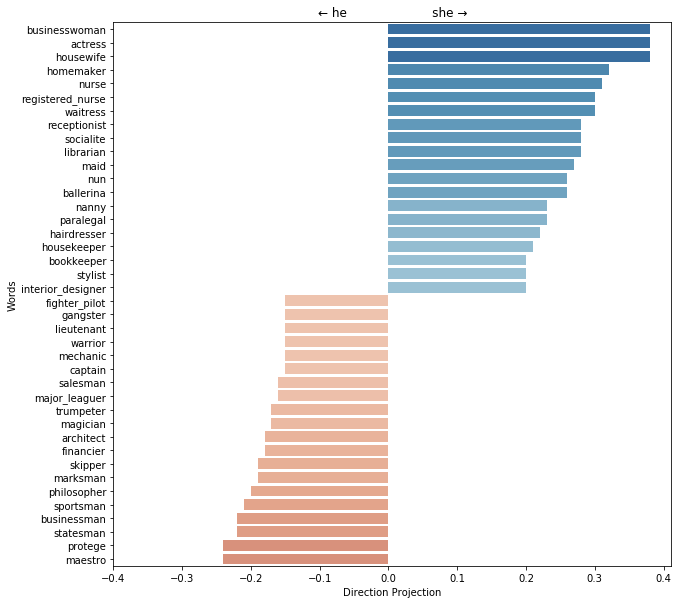

In [ ]:
import matplotlib.pylab as plt

f, ax = plt.subplots(1, figsize=(10, 10))

w2v_small_gender_bias.plot_projection_scores(n_extreme=20, ax=ax);

EXTRA: Demo - Visualizing gender bias with [Word Clouds](http://wordbias.umiacs.umd.edu/)

## 5.8 - Are the projections of occupation words on the gender direction related to the real world?

Let's take the percentage of female in various occupations from the Labor Force Statistics of 2017 Population Survey.

Taken from: https://arxiv.org/abs/1804.06876

In [ ]:
from operator import itemgetter  # 🛠️ For idiomatic sorting in Python

from responsibly.we.data import OCCUPATION_FEMALE_PRECENTAGE

sorted(OCCUPATION_FEMALE_PRECENTAGE.items(), key=itemgetter(1))

[('carpenter', 2),
 ('mechanician', 4),
 ('construction_worker', 4),
 ('laborer', 4),
 ('driver', 6),
 ('sheriff', 14),
 ('mover', 18),
 ('developer', 20),
 ('farmer', 22),
 ('guard', 22),
 ('chief', 27),
 ('janitor', 34),
 ('lawyer', 35),
 ('cook', 38),
 ('physician', 38),
 ('ceo', 39),
 ('analyst', 41),
 ('manager', 43),
 ('supervisor', 44),
 ('salesperson', 48),
 ('editor', 52),
 ('designers', 54),
 ('accountant', 61),
 ('auditor', 61),
 ('writer', 63),
 ('baker', 65),
 ('clerk', 72),
 ('cashier', 73),
 ('counselors', 73),
 ('attendant', 76),
 ('teacher', 78),
 ('sewer', 80),
 ('librarian', 84),
 ('assistant', 85),
 ('cleaner', 89),
 ('housekeeper', 89),
 ('nurse', 90),
 ('receptionist', 90),
 ('hairdressers', 92),
 ('secretary', 95)]

In [ ]:
dir(responsibly.we.data)
# from responsibly.we.data import OCCUPATION_MALE_PRECENTAGE

# for i in sorted(OCCUPATION_MALE_PRECENTAGE.items(), key=itemgetter(1)):
#   print(i[0])

['BOLUKBASI_DATA',
 'KeyedVectors',
 'OCCUPATION_FEMALE_PRECENTAGE',
 'WEAT_DATA',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'json',
 'load_json_resource',
 'load_w2v_small',
 'resource_filename',
 'resource_string',
 'warnings']

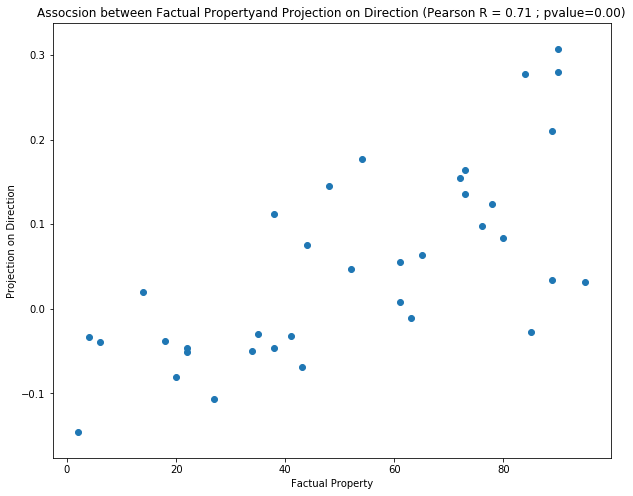

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 8))

w2v_small_gender_bias.plot_factual_association(ax=ax);

### Also: Word embeddings quantify 100 years of gender stereotypes

Garg, N., Schiebinger, L., Jurafsky, D., & Zou, J. (2018). [Word embeddings quantify 100 years of gender and ethnic stereotypes](https://www.pnas.org/content/pnas/115/16/E3635.full.pdf). Proceedings of the National Academy of Sciences, 115(16), E3635-E3644.



<small>Data: Google Books/Corpus of Historical American English (COHA)</small>

Word embedding is sometimes used to analyze a collection of text in **digital humanities** - putting a system into a human context.

🧪 Quite strong and interesting observation! We used "external" data which wan't used directly to create the word embedding.

It takes us to think about the *data generation process* - in both cases it is the "world", but it will be difficult to argue for causality only in one direction:
1. Text in newspapers
2. Employment by gender

## 5.9 - Bias Measure

1. Project each **neutral profession names** on the gender direction
2. Calculate the absolute value of each projection
3. Average it all

In [ ]:
# using responsibly

w2v_small_gender_bias.calc_direct_bias()

0.07307905466893876

In [ ]:
# what responsibly does:

neutral_profession_projections = [w2v_small[word] @ w2v_small_gender_bias.direction
                                  for word in neutral_profession_names]

abs_neutral_profession_projections = [abs(proj) for proj in neutral_profession_projections]

sum(abs_neutral_profession_projections) / len(abs_neutral_profession_projections)

🧪 What are the assumptions of the direct bias measure? How the choice of neutral word effect on the definition of the bias?

# Part Six: Back to Psychology...
<big>💎</big>

- Let's look on another metric, called **WEAT** (Word Embedding Association Test) which is inspired by **IAT** (Implicit-Association Test) from Pyschology.

- Try IAT by yourself: https://implicit.harvard.edu/implicit/

**Caliskan, A., Bryson, J. J., & Narayanan, A. (2017). [Semantics derived automatically from language corpora contain human-like biases.](http://www.cs.bath.ac.uk/~jjb/ftp/CaliskanEtAl-authors-full.pdf) Science, 356(6334), 183-186.**


## 9.1 - Ingredients

1. Attribute words (e.g., Male ve. Female)

2. Target words (e.g., Math vs. Arts)

In [ ]:
from responsibly.we import load_w2v_small

w2v_small = load_w2v_small()

In [ ]:
# 🛠️ For copying a nested data structure in Python
from copy import deepcopy

from responsibly.we.weat import WEAT_DATA

# B. A. Nosek, M. R. Banaji, A. G. Greenwald, Math=male, me=female, therefore math≠me.,
# Journal of Personality and Social Psychology 83, 44 (2002).
weat_gender_science_arts = deepcopy(WEAT_DATA[7])

In [ ]:
# 🛠️ filter words from the original IAT experiment that are not presend in the reduced Word2Vec model

from responsibly.we.weat import _filter_by_model_weat_stimuli

_filter_by_model_weat_stimuli(weat_gender_science_arts, w2v_small)

In [ ]:
weat_gender_science_arts['first_attribute']

{'name': 'Male terms',
 'words': ['brother',
  'father',
  'grandfather',
  'he',
  'him',
  'his',
  'son',
  'uncle']}

In [ ]:
weat_gender_science_arts['second_attribute']

{'name': 'Female terms',
 'words': ['aunt',
  'daughter',
  'grandmother',
  'her',
  'hers',
  'mother',
  'she',
  'sister']}

In [ ]:
weat_gender_science_arts['first_target']

{'name': 'Science',
 'words': ['astronomy',
  'chemistry',
  'experiment',
  'physics',
  'science',
  'technology']}

In [ ]:
weat_gender_science_arts['second_target']

{'name': 'Arts',
 'words': ['dance', 'drama', 'literature', 'novel', 'poetry', 'symphony']}

## 6.2 - Recipe

➕ Male x Science

➖ Male x Arts

➖ Female x Science

➕ Female x Arts

In [ ]:
def calc_combination_similiarity(model, attribute, target):
    score = 0

    for attribute_word in attribute['words']:

        for target_word in target['words']:

            score += w2v_small.similarity(attribute_word,
                                          target_word)

    return score

In [ ]:
male_science_score = calc_combination_similiarity(w2v_small,
                                                  weat_gender_science_arts['first_attribute'],
                                                  weat_gender_science_arts['first_target'])

male_science_score

3.0811213604174554

In [ ]:
male_arts_score = calc_combination_similiarity(w2v_small,
                                               weat_gender_science_arts['first_attribute'],
                                               weat_gender_science_arts['second_target'])

male_arts_score

3.8449553288519382

In [ ]:
female_science_score = calc_combination_similiarity(w2v_small,
                                                    weat_gender_science_arts['second_attribute'],
                                                    weat_gender_science_arts['first_target'])

female_science_score

2.9657545754453167

In [ ]:
female_arts_score = calc_combination_similiarity(w2v_small,
                                                 weat_gender_science_arts['second_attribute'],
                                                 weat_gender_science_arts['second_target'])

female_arts_score

6.15777819044888

In [ ]:
male_science_score - male_arts_score - female_science_score + female_arts_score

2.4281896465690807

In [ ]:
len(weat_gender_science_arts['first_attribute']['words'])

8

In [ ]:
# gender bias in total (normalized)
(male_science_score - male_arts_score - female_science_score + female_arts_score) / 8

0.3035237058211351

## 6.3 - All WEAT Tests

In [ ]:
from responsibly.we import calc_all_weat

calc_all_weat(w2v_small, [weat_gender_science_arts])

,Target words,Attrib. words,Nt,Na,s,d,p
0,Science vs. Arts,Male terms vs. Female terms,6x2,8x2,0.3035,1.3731,8.7e-03


### ⚡ Important Note: Our results are a bit different from the paper because we use a reduced Word2Vec.

### ⚡Caveats

#### Comparing WEAT to the IAT

- Individuals (IAT) vs. Words (WEAT)
- Therefore, the meanings of the effect size and p-value are totally different!

#### ⚡🦄 WEAT score definition

The definition of the WEAT score is structured differently (but it is computationally equivalent). The original formulation matters to compute the p-value. Refer to the paper for details.

### 🧪 Effect size comparision between human and machine bias

With the effect size, we can "compare" a human bias to a machine one. It raises the question whether the baseline for meauring bias/fairness of a machine should be human bias? Then a well-performing machine shouldn't be necessarily not biased, but only less biased than human (think about autonomous cars or semi-structured vs. unstructured interview).

## 6.4 - WEAT vs. IAT

Lewis, M., & Lupyan, G. [What are we learning from language? Associations between gender biases and distributional semantics in 25 languages](https://mollylewis.shinyapps.io/iatlang_SI/).


1. Implicit male-career association (adjusted for participant age, gender, and congruent/incongruent block order) as a function of the linguistic male-career association derived from word-embeddings *r*(23) = 0.48 [0.11, 0.74]; *p* = 0.01; *n* = 25; Study 1b). Each point corresponds to a language. The size of the point is proportional to the number of participants who come from the country in which the language is dominant (total = 656,636 participants). Linguistic associations are estimated from models trained on text in each language from the Wikipedia corpus. Larger values indicate a greater tendency to associate men with the concept of career and women with the concept of family.

2. Difference (UK minus US) in implicit association versus linguistic association for 31 IAT types (*N* = 27,045 participants). Error bands indicate standard error of the linear model estimate.


## 6.5 Representational Dissimilarity Matrix (RDM) --> for RSA (next week)

In [ ]:
from itertools import combinations
from scipy.spatial.distance import cosine

occupation_words = BOLUKBASI_DATA['gender']['profession_names'][:10] + BOLUKBASI_DATA['gender']['profession_names'][-10:]

# Get word embeddings for occupation words
occupation_embeddings = np.array([w2v_small.get_vector(word) for word in occupation_words])

# Compute the RDM
n_words = len(occupation_words)
rdm = np.zeros((n_words, n_words))
for i, j in combinations(range(n_words), 2):
    rdm[i, j] = cosine(occupation_embeddings[i], occupation_embeddings[j])
    rdm[j, i] = rdm[i, j]
print(rdm[:5])


[[0.         0.70701304 0.75830077 0.83760637 0.62261689 0.54834634
  0.7615822  0.72220445 0.68124652 0.68964475 0.80281734 0.85229631
  0.6752722  0.66510892 0.78749308 0.91341248 0.62734964 0.66489133
  0.8277681  0.80715141]
 [0.70701304 0.         0.74871647 0.79468158 0.79807039 0.82200164
  0.75619672 0.82516357 0.63958007 0.79852113 0.74846885 0.81831388
  0.664377   0.60787612 0.84934142 0.85673533 0.79061854 0.71810579
  0.82690336 0.74639034]
 [0.75830077 0.74871647 0.         0.20699912 0.84438199 0.90139715
  0.60024774 0.81114259 0.83256261 0.81494153 0.69196963 0.64289781
  0.70052153 0.74936047 0.86877033 0.73653838 0.78542127 0.80012183
  0.65508056 0.5753971 ]
 [0.83760637 0.79468158 0.20699912 0.         0.88421842 0.911044
  0.72827187 0.8271087  0.84729438 0.84755817 0.67660218 0.61763105
  0.77915861 0.61283585 0.89928854 0.83699018 0.86935738 0.78103147
  0.77719173 0.65508816]
 [0.62261689 0.79807039 0.84438199 0.88421842 0.         0.62936041
  0.8609208  0.669

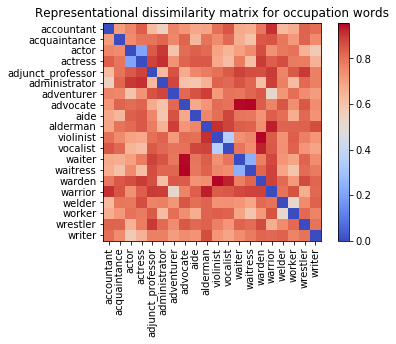

In [ ]:
import matplotlib.pyplot as plt

# Create heatmap of representational dissimilarity matrix
plt.imshow(rdm, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(occupation_words)), occupation_words, rotation=90)
plt.yticks(range(len(occupation_words)), occupation_words)
plt.title('Representational dissimilarity matrix for occupation words')
plt.show()


# Part Seven: Your Turn!
<big>⌨️</big>

Note: The first two tasks require a basic background in Python programming. For the last task, you need some experience with Machine Learning and Natural Langauge Processing (NLP) as well.

## Task 1 - Racial bias

Let's explor racial bias usint Tolga's approche. Will use the [`responsibly.we.BiasWordEmbedding`](http://docs.responsibly.ai/word-embedding-bias.html#ethically.we.bias.BiasWordEmbedding) class. `GenderBiasWE` is a sub-class of `BiasWordEmbedding`.

In [ ]:
from responsibly.we import BiasWordEmbedding

w2v_small_racial_bias = BiasWordEmbedding(w2v_small, only_lower=True)

💎💎💎 Identify the racial direction using the `sum` method

In [ ]:
white_common_names = ['Emily', 'Anne', 'Jill', 'Allison', 'Laurie', 'Sarah', 'Meredith', 'Carrie',
                      'Kristen', 'Todd', 'Neil', 'Geoffrey', 'Brett', 'Brendan', 'Greg', 'Matthew',
                      'Jay', 'Brad']

black_common_names = ['Aisha', 'Keisha', 'Tamika', 'Lakisha', 'Tanisha', 'Latoya', 'Kenya', 'Latonya',
                      'Ebony', 'Rasheed', 'Tremayne', 'Kareem', 'Darnell', 'Tyrone', 'Hakim', 'Jamal',
                      'Leroy', 'Jermaine']

w2v_small_racial_bias._identify_direction('Whites', 'Blacks',
                                          definitional=(white_common_names, black_common_names),
                                          method='sum')

Use the neutral profession names to measure the racial bias

In [ ]:
from responsibly.we.data import BOLUKBASI_DATA

neutral_profession_names = BOLUKBASI_DATA['gender']['neutral_profession_names']

In [ ]:
BOLUKBASI_DATA['gender']['profession_names']

('accountant',
 'acquaintance',
 'actor',
 'actress',
 'adjunct_professor',
 'administrator',
 'adventurer',
 'advocate',
 'aide',
 'alderman',
 'alter_ego',
 'ambassador',
 'analyst',
 'anthropologist',
 'archaeologist',
 'archbishop',
 'architect',
 'artist',
 'artiste',
 'assassin',
 'assistant_professor',
 'associate_dean',
 'associate_professor',
 'astronaut',
 'astronomer',
 'athlete',
 'athletic_director',
 'attorney',
 'author',
 'baker',
 'ballerina',
 'ballplayer',
 'banker',
 'barber',
 'baron',
 'barrister',
 'bartender',
 'biologist',
 'bishop',
 'bodyguard',
 'bookkeeper',
 'boss',
 'boxer',
 'broadcaster',
 'broker',
 'bureaucrat',
 'businessman',
 'businesswoman',
 'butcher',
 'butler',
 'cab_driver',
 'cabbie',
 'cameraman',
 'campaigner',
 'captain',
 'cardiologist',
 'caretaker',
 'carpenter',
 'cartoonist',
 'cellist',
 'chancellor',
 'chaplain',
 'character',
 'chef',
 'chemist',
 'choreographer',
 'cinematographer',
 'citizen',
 'civil_servant',
 'cleric',
 'clerk

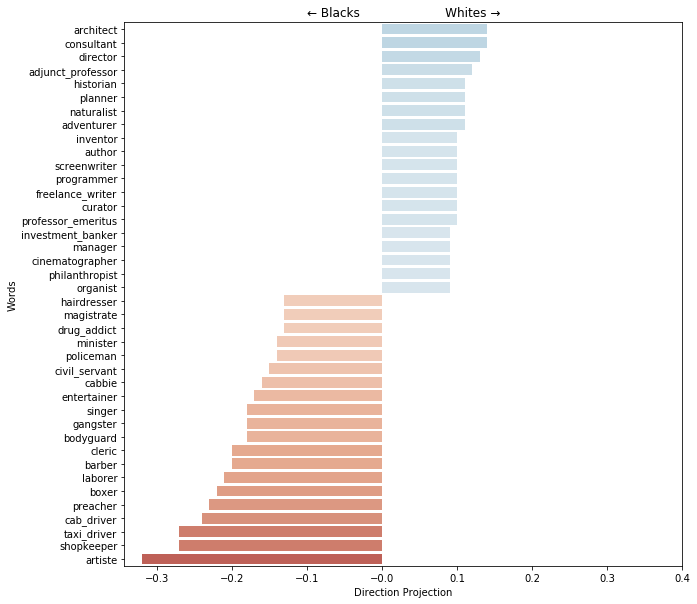

In [ ]:
import matplotlib.pylab as plt

f, ax = plt.subplots(1, figsize=(10, 10))

w2v_small_racial_bias.plot_projection_scores(neutral_profession_names, n_extreme=20, ax=ax);

Calculate the direct bias measure

In [ ]:
# Your Code Here...

Keep exploring the racial bias

In [ ]:
# Your Code Here...

In [ ]:
from responsibly.we import calc_weat_pleasant_unpleasant_attribute

In [ ]:
# Your Code Here...

## Task 2 - Racial bias analysis

Now we are ready to blend all together. You have two classifiers, each one of them was trained on the same dataset, but with a different word embedding. The first used the original word2vec, and the other was undergone the neutralize-"debias" process. We computed the probability estimates for the EEC data twice for each one of the classifiers.


**Think about how to evaluate the impact of replacing the word embedding concerning gender bias. Keep in mind that the female and male EEC data is paired!**

#### Your analysis can take two points of view (there are more, but you start with that):
1. Analyze the difference between the female and male probability estimations for each system *separately* and compare the results.
2. Analyze the difference of differences; start with the difference of probability estimations between the paired female and male sentences for each system, and then compare the two differences.


#### Few possible ideas of what to do:
1. Plot distributions  ([`seaborn.displot`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot))
2. Compute the [effect size](https://en.wikipedia.org/wiki/Effect_size#Cohen's_d)
3. Perform statistical hypothesis testings to check whether means are eqaul using the independenet t-test ([`scipy.stats.ttest_rel`])

In [ ]:
# Your Code Here...

#### What is your conclusion? What would be your next steps?


# Part Thirteen: Takeaways
<big>💎💎</big>

1. Text, as long as it's large enough, contains human-like bias;
2. Through natural language processing, bias can be quantified.

# Part Fourteen: Resources
<big>💎💎</big>
